In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import skimage.io as io

(700, 1080, 3)


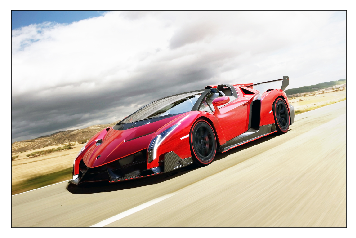

In [2]:
im = io.imread('/media/akhil/0E8610650E861065/Pictures/Wallpapers/2014_lamborghini_veneno_roadster-wide.jpg')
im = cv2.resize(im, (1080,700))

plt.figure(0)
plt.xticks([])
plt.yticks([])
plt.imshow(im)
print (im.shape)
plt.show()

In [3]:
data = im.reshape((-1, 3))
print(data.shape)

(756000, 3)


In [4]:
km = KMeans(n_clusters = 32)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=32, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
dom_colors = km.cluster_centers_.astype(np.uint8)

In [12]:
plt.figure(0)

for cx in range(dom_colors.shape[0]):
    plt.subplot(1, dom_colors.shape[0], cx + 1)
    plt.xticks([])
    plt.yticks([])
    col = np.zeros((50, 50, 3), dtype=np.uint8)
    col[:, :, :] = dom_colors[cx]
    plt.imshow(col)


In [7]:
new_img = np.zeros_like(data)
labels = km.predict(data)
print(np.unique(labels, return_counts= True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32), array([ 18604, 113126,  15787,  33394,   6363,  19188,  50059,  31702,
         5661,   7207,  11506,  10910,  15950,  51331,  43318,   7201,
         4716,  18623,  84556,   6776,  12053,   4549,  51694,   7764,
        24690,  14920,   6184,  16854,  44684,   5425,   6955,   4250]))


In [8]:
for ix in range(new_img.shape[0]):
    new_img[ix, :] = dom_colors[labels[ix]]

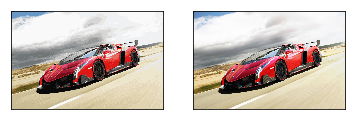

In [16]:
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(new_img.reshape(im.shape))

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(im)